In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import Toolkit_01 as ml

In [21]:
init_data = pd.read_csv("AdmissionPredict.csv")
data = init_data.copy().dropna()
data_x = data.drop(["Chance of Admit", "Serial No."], axis=1)
y = data["Chance of Admit"]

# First way. my function :)

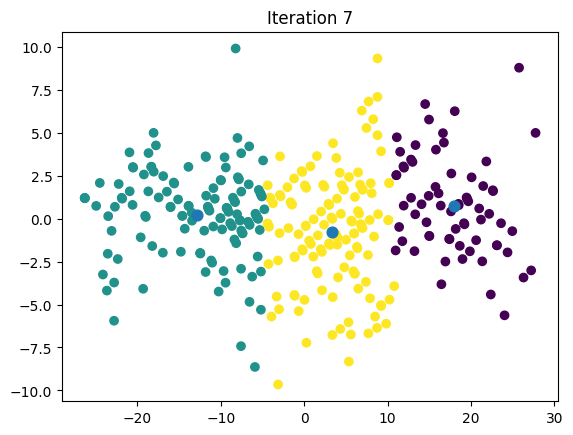

In [22]:
my_data = data_x.copy()
model = ml.K_means(my_data, 3, 100)
model.kmeans()

# second way...
## compare with GRE and TOEFL

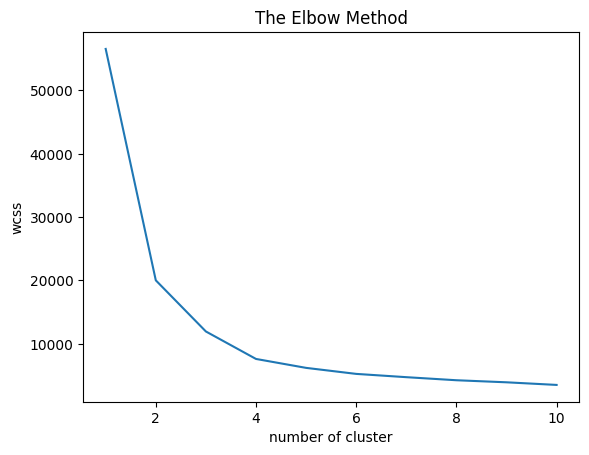

In [23]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=1)
    kmeans.fit(data_x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.ylabel("wcss")
plt.xlabel("number of cluster")
plt.title("The Elbow Method")
plt.show()

# so we choose i = 3
### 3 groups:

In [24]:
model = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_predict = model.fit_predict(data_x)
data_x["type"] = y_predict


def to_str(x):
    if x == 0:
        return "type1"
    if x == 1:
        return "type2"
    if x == 2:
        return "type3"


data_x["name"] = data_x.type.apply(lambda x: to_str(x))
data_x["ad"] = pd.DataFrame(y)
data_x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,type,name,ad
0,337.0,118.0,4,4.5,4.5,9.65,1,1,type2,0.92
4,314.0,103.0,2,2.0,3.0,8.21,0,0,type1,0.65
5,330.0,115.0,5,4.5,3.0,9.34,1,1,type2,0.90
7,308.0,101.0,2,3.0,4.0,7.90,0,2,type3,0.68
8,302.0,102.0,1,2.0,1.5,8.00,0,2,type3,0.50
...,...,...,...,...,...,...,...,...,...,...
394,329.0,111.0,4,4.5,4.0,9.23,1,1,type2,0.89
395,324.0,110.0,3,3.5,3.5,9.04,1,1,type2,0.82
397,330.0,116.0,4,5.0,4.5,9.45,1,1,type2,0.91
398,312.0,103.0,3,3.5,4.0,8.78,0,0,type1,0.67


Text(0.5, 1.0, 'Cluster for cars')

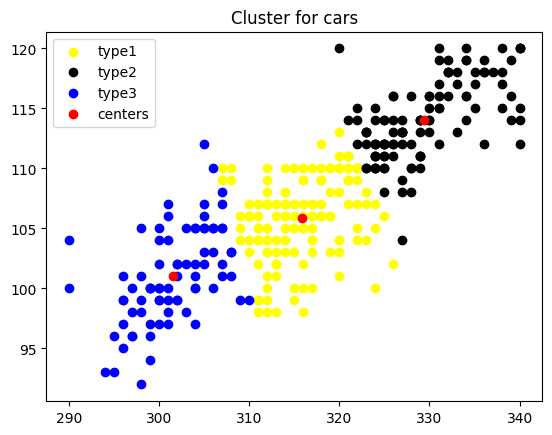

In [13]:
plt.scatter(data_x[data_x["name"] == "type1"].iloc[:, 0], data_x[data_x["name"] == "type1"].iloc[:, 1], marker="o",
            color="yellow", label="type1")
plt.scatter(data_x[data_x["name"] == "type2"].iloc[:, 0], data_x[data_x["name"] == "type2"].iloc[:, 1], marker="o",
            color="black", label="type2")
plt.scatter(data_x[data_x["name"] == "type3"].iloc[:, 0], data_x[data_x["name"] == "type3"].iloc[:, 1], marker="o",
            color="blue", label="type3")
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker="o", color="Red", label="centers")
plt.legend()
plt.title("Cluster for cars")

In [17]:

print(model.predict([[340, 120, 5, 4.5, 4.5, 9.6, 1]])[0])
print(model.predict([[340, 120, 5, 4, 4, 9, 1]])[0])
print(model.predict([[315, 110, 5, 4, 4, 9, 1]])[0])
print(model.predict([[290, 80, 1, 1, 1, 1, 0]])[0])
print(model.predict([[304, 100, 4, 1.5, 2.5, 7.84, 0]])[0])

1
1
0
2
2


D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
